# Signal Analysis and Filtering Tutorials

## Low-Pass Filter Example

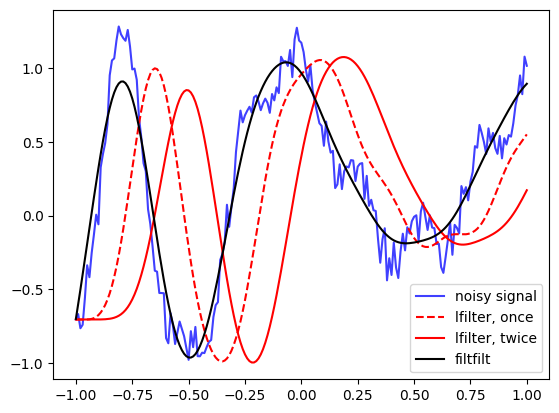

In [7]:
## Low Pass Filtered Signal Example
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

rng = np.random.default_rng()
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1 * np.sin(2*np.pi*1.25*t + 1) +
     0.18 * np.cos(2*np.pi*3.85*t))
xn = x + rng.standard_normal(len(t)) * 0.08
b, a = signal.butter(3, 0.05)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi = zi*xn[0])

z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, xn)

plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), 
           loc='best')
plt.show()


In [9]:
# Low Pass Filter Example in Python: Filters Signals Above 100 Hz
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter parameters
cutoff_frequency = 100 # cutoff frequency in Hz
fs = 1000 # Sampling Rate in Hz
order = 4 # Filter Order

# Design the low-pass filter
nyq = 0.5 * fs
normal_cutoff = cutoff_frequency / nyq
b, a = butter(order, normal_cutoff, btype='lowpass')

# Sample data (with time vector)
t = np.linspace(0, 1, 1000) # Time vector for 1 second signal
data = np.sin(2*np.pi*150*t) + np.random.rand(1000) # Example signal with noise

# Apply the filter
filtered_data = filtfilt(b, a, data)

# FFT Representation
fft_data = np.fft.fft(data)
freq_bins_data = np.arange(0, fs/2, step =(fs/len(fft_data)))

fft_filtered_data = np.fft.fft(filtered_data)
freq_bins_filtered_data = np.arange(0, 
                                    fs/2, step=(fs/len(fft_filtered_data)))


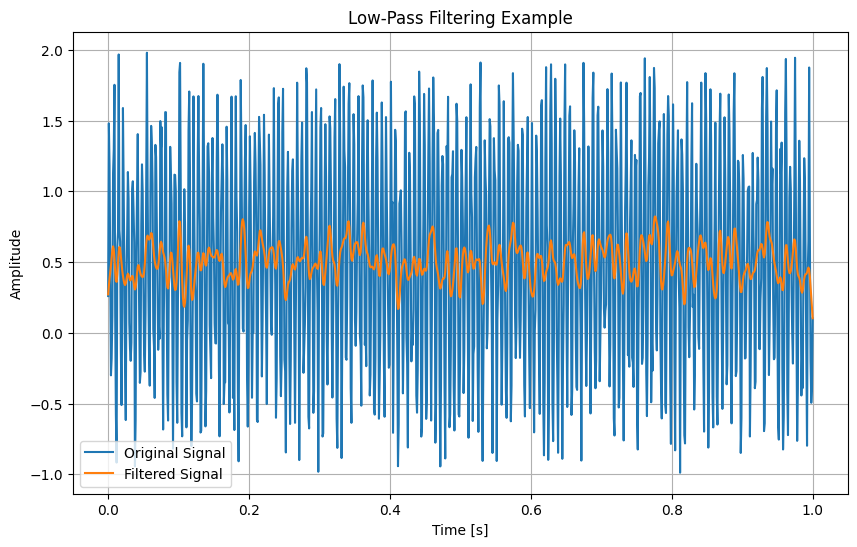

In [10]:
# Plot the original and the filtered data
plt.figure(figsize = (10, 6))

plt.plot(t, data, label='Original Signal')
plt.plot(t, filtered_data, label = 'Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Low-Pass Filtering Example')
plt.legend()
plt.grid(True)

plt.show()


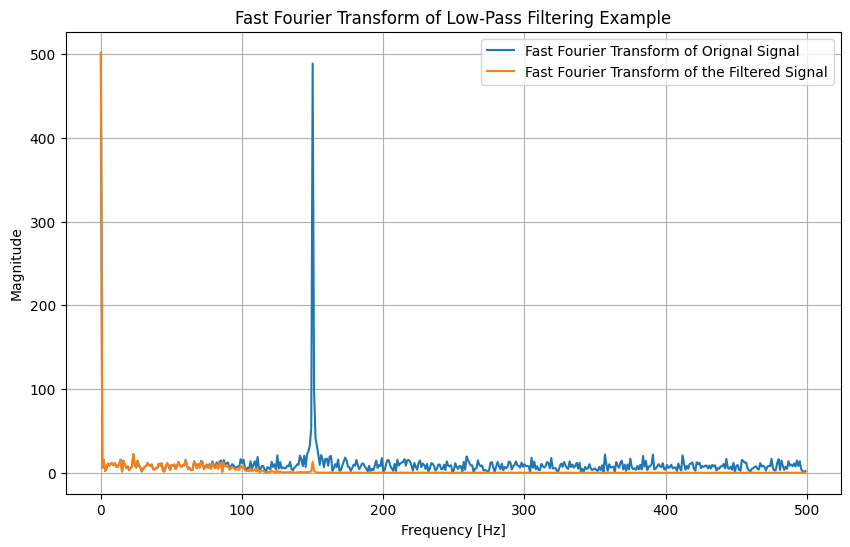

In [11]:
# FFT of the Low-Pass Filtering Example
plt.figure(figsize=(10, 6))
plt.plot(freq_bins_data, np.abs(fft_data[0:len(fft_data)//2]), 
         label='Fast Fourier Transform of Orignal Signal')
plt.plot(freq_bins_filtered_data, 
         np.abs(fft_filtered_data[0:len(fft_filtered_data)//2]), 
         label='Fast Fourier Transform of the Filtered Signal')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Fast Fourier Transform of Low-Pass Filtering Example')
plt.legend()
plt.grid(True)
plt.show()


## High-Pass Filtering Example

In [13]:
# High Pass Filter Example: Filters Signals Below 200 Hz
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter_parameters
cutoff_frequency = 200 # Cutoff frequency in Hz
fs = 1000 # Sample rate in Hz
order = 4 # Order of the filter

# Design the high-pass filter (change btype to 'highpass')
nyq = 0.5 * fs
normal_cutoff = cutoff_frequency / nyq
b, a = butter(order, normal_cutoff, btype='highpass') 

# Sample data (with time vector)
t = np.linspace(0, 1, 1000)
data = np.sin(2*np.pi*150*t) + np.random.rand(1000) # Example signal with noise

# Apply the filter
filtered_data = filtfilt(b, a, data)

# FFT & Plot
fft_data = np.fft.fft(data)
freq_bins_data = np.arange(0, fs/2, step =(fs/len(fft_data)))

fft_filtered_data = np.fft.fft(filtered_data)
freq_bins_filtered_data = np.arange(0, 
                                    fs/2, step=(fs/len(fft_filtered_data)))


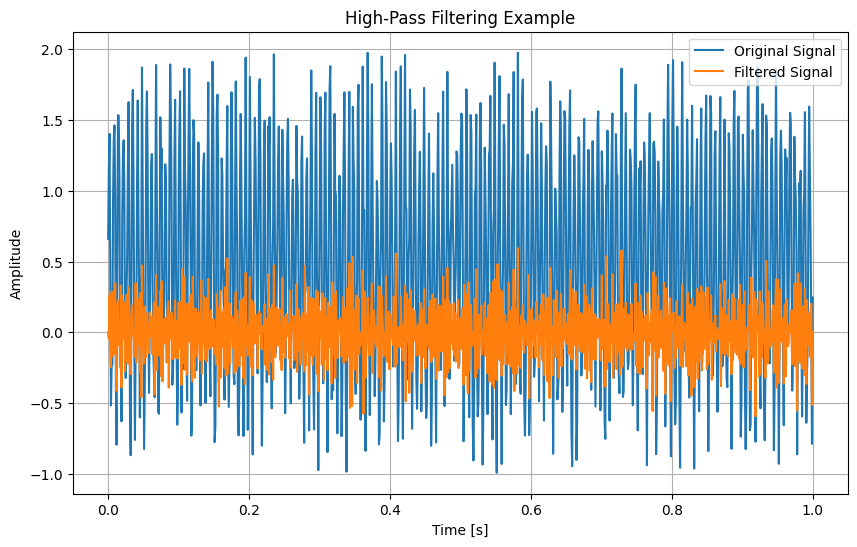

In [14]:
# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, data, label='Original Signal')
plt.plot(t, filtered_data, label='Filtered Signal')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('High-Pass Filtering Example')
plt.legend()
plt.grid(True)
plt.show()


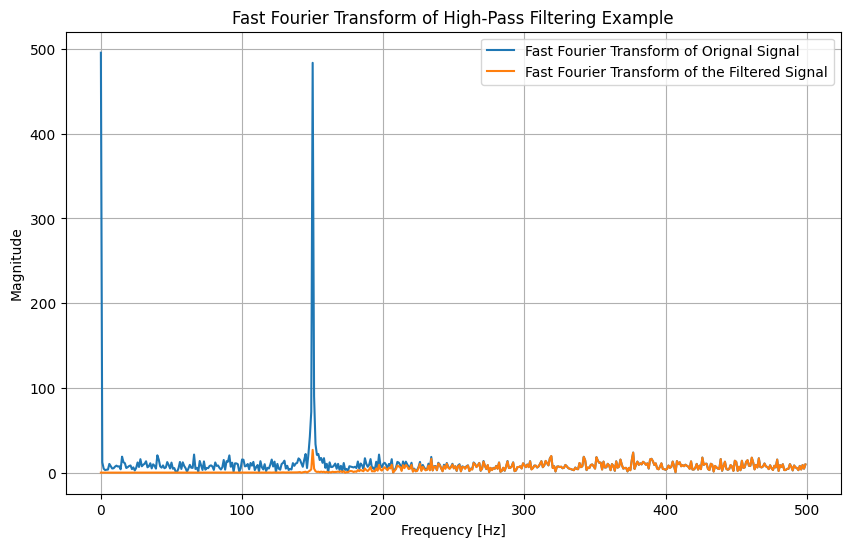

In [15]:
# FFT of the High-Pass Filtering Example
plt.figure(figsize=(10, 6))
plt.plot(freq_bins_data, np.abs(fft_data[0:len(fft_data)//2]), 
         label='Fast Fourier Transform of Orignal Signal')
plt.plot(freq_bins_filtered_data, 
         np.abs(fft_filtered_data[0:len(fft_filtered_data)//2]), 
         label='Fast Fourier Transform of the Filtered Signal')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Fast Fourier Transform of High-Pass Filtering Example')
plt.legend()
plt.grid(True)
plt.show()
